
<hr/>
[**Dhruv Patel**](https://www.kaggle.com/dhruvpatel1057)[](http://)
<hr/>

### Red Wine Quality Dataset - EDA and Classification

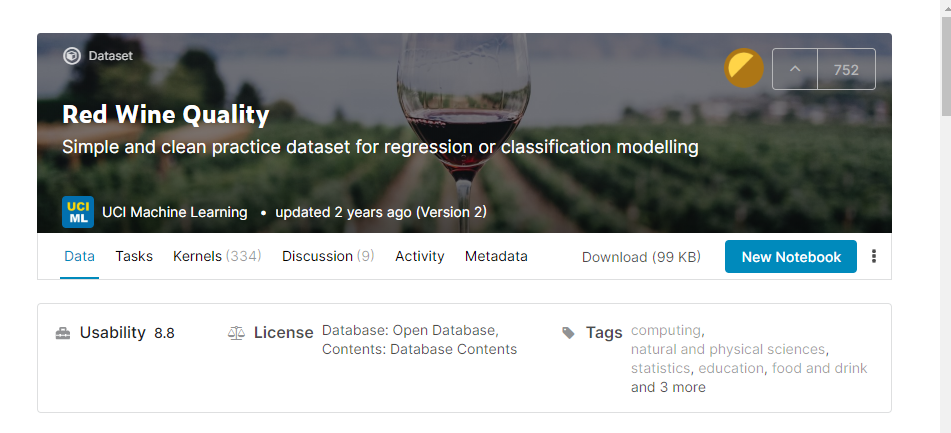

<br>
<br>


#### Table of Contents

<font color=green>
1. [Overview](#1)
1. [Importing Libraries](#2)
1. [Data Visualization](#3)
1. [Data Preprocessing](#4)
1. [Creating Pipelines And Training Models](#5)
1. [Conclusion](#6)
<hr/>



# Lets Get Started


## <span id="1"></span> ** 1. Overview **

Input Variables:
- **fixed acidity: ** most acids involved with wine or fixed or nonvolatile
- **volatile acidity: ** the amount of acetic acid in wine
- **citric acid: ** found in small quantities, citric acid can add 'freshness' and flavor to wines 
- **residual sugar: ** the amount of sugar remaining after fermentation stops
- **chlorides: ** the amount of salt in the wine
- **free sulfur dioxide: ** the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion
- **total sulfur dioxide: ** amount of free and bound forms of S02
- **density: ** the density of water is close to that of water depending on the percent alcohol and sugar content
- **pH: ** describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic)
- **sulphates: ** a wine additive which can contribute to sulfur dioxide gas (S02) levels 
- **alcohol: ** the percent alcohol content of the wine<br>

Output Variable:
- **quality: ** output variable (based on sensory data, score between 0 and 10)

## <span id="2"></span> ** 2. Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### for multiple outputs in cell
from IPython.core.interactiveshell import InteractiveShell  ## getting
InteractiveShell.ast_node_interactivity = "all"


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


from sklearn.pipeline import Pipeline



from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score





### Reading the Data

In [ ]:
data = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

In [ ]:
data.head()

In [ ]:
data.columns
data.shape


In [ ]:
data.groupby("quality")["quality"].count()   ## here is the distribution of the 


In [ ]:
data[data["quality"]==4].shape

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

In [ ]:
data.describe()

## <span id="3"></span> ** 3. Data Visualization**

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(data=data,x="quality",y="volatile acidity",palette="rocket")

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(data=data,x="quality",y="fixed acidity",palette="rocket")

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(data=data,x="quality",y="fixed acidity",palette="rocket")

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(data=data,x="quality",y="citric acid",palette="rocket")

plot = plt.figure(figsize=(5,5))
sns.barplot(data=data,x="quality",y="residual sugar",palette="rocket")

plot = plt.figure(figsize=(5,5))
sns.barplot(data=data,x="quality",y="chlorides",palette="rocket")

In [ ]:
plot = plt.figure(figsize=(5,5))
sns.barplot(data=data,x="quality",y="pH",palette="vlag")

plot = plt.figure(figsize=(5,5))
sns.barplot(data=data,x="quality",y="density",palette="rocket")


In [ ]:

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [ ]:
plot = plt.figure(figsize=(5,5))

sns.jointplot(data=data,x="quality",y="alcohol", kind="reg", truncate=False,
                  
                  color="r", height=7)

## <span id="4"></span> ** 4. Preprocessing**

In [ ]:
## now it's   time to preprocess our data

data.groupby("quality")["quality"].count()

In [ ]:
## we can now divide them into 3 segments : bad, average, good

bins =(2,4,6,8)
names =["bad","average","good"]

data["quality"] = pd.cut(data["quality"],bins=bins,labels=names)

In [ ]:
data.groupby("quality")["quality"].count()

In [ ]:
data.head()

In [ ]:
### now we can see  there is average, bad ,and good labels in quality columns

sns.countplot(data["quality"])

In [ ]:
le = LabelEncoder()

data["quality"] = le.fit_transform(data["quality"])


In [ ]:
data.head()

In [ ]:
data.groupby("quality")["quality"].count()

In [ ]:
### now we can see  the average, bad ,and good labels in quality columns are encoded into numeric 

sns.countplot(data["quality"])

In [ ]:
X=data.drop("quality",axis=1)
y = data["quality"]

In [ ]:
X.head()

In [ ]:
y.value_counts()

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                                train_size=0.8,
                                                                test_size=0.2,
                                                                random_state=0)


## <span id="5"></span> ** 5. Creating Pipelines And Training Models**

In [ ]:
scaler = StandardScaler()

model_rf=RandomForestClassifier(n_estimators=100,random_state=0)
model_xgb = XGBClassifier(n_estimators=200,random_state=0)



rf_pipeline =Pipeline(steps=[
    ("sc",scaler),
    ("rf",model_rf)
])

xgb_pipeline = Pipeline(steps=[
    ("sc",scaler),
    ("xgb",model_xgb)
])


parameters_xgb = {'xgb__n_estimators':[i for i in range(100,1000,100)]}

parameters_rf = {'rf__n_estimators':[i for i in range(100,1000,100)]}

In [ ]:
cv = GridSearchCV(xgb_pipeline,parameters_xgb,cv=5)


In [ ]:
cv.fit(X_train,y_train)

In [ ]:
preds = cv.predict(X_valid)

In [ ]:
print(classification_report(y_valid,preds))

In [ ]:
print(confusion_matrix(y_valid,preds))

In [ ]:
rf_cv = GridSearchCV(rf_pipeline,parameters_rf,cv=5)


In [ ]:
rf_cv.fit(X_train,y_train)

In [ ]:
rf_preds = rf_cv.predict(X_valid)

print(confusion_matrix(y_valid,rf_preds))

In [ ]:
print(classification_report(y_valid,rf_preds))

In [ ]:
rf_cv.score(X_valid,y_valid)

In [ ]:
cv.score(X_valid,y_valid)

In [ ]:

dt_classifier = DecisionTreeClassifier(criterion = 'gini', max_features=6, max_leaf_nodes=400, random_state = 0)


In [ ]:
dt_pipeline = Pipeline(steps=[
    ("sc",scaler),
    ("dt",dt_classifier)
])


params_dt = {"dt__criterion":["gini","entropy"],
          "dt__max_features":[3,4,5,6,7,8,9,10],
          "dt__max_leaf_nodes":[200,300,400,500]
         }

In [ ]:
dt_cv = GridSearchCV(dt_pipeline,params_dt,cv=5)


In [ ]:
dt_cv.fit(X_train,y_train)

In [ ]:
dt_cv.best_params_

In [ ]:
dt_cv.score(X_valid,y_valid)

In [ ]:
dt_preds=dt_cv.predict(X_valid)

In [ ]:
print(classification_report(y_valid,dt_preds))

In [ ]:
print(confusion_matrix(y_valid,dt_preds))

## <span id="6"></span> ** 6. Conclusion**

Thus in this kernel we built several pipelines using sklearn and used models like XGBoostClassifier,RandomForest,and DecisionTreeClassifier for classifying the wine quality in our pre-defined segments (good,average,bad)
There's still lot more we can do with our models and data like feature engineering and fine tuning the models adding some more parameters.
I will keep updating this kernel frequently as possible



<b><font color="red">Please <b><font color="green">UPVOTE </font></b> this notebook if you like it, this keeps me motivated for creating more such notebooks ,thank you
